# Descriptive Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
dataframe = pd.DataFrame(columns=["job_id", "job_skill", "month", "year", "skill_id" ,"esco_skill_name", "alternative_name", "prompt"])
FOLDER = "../data/green_skill_classification"

folders = []

for file in os.listdir(FOLDER):
    if file.endswith(".csv"):
        folders.append(os.path.join(FOLDER, file))

folders.sort()
for file in folders:
    df_part = pd.read_csv(file)
    dataframe = pd.concat([dataframe, df_part], ignore_index=True)

/tmp/ipykernel_300096/149142455.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe = pd.concat([dataframe, df_part], ignore_index=True)


In [4]:
dataframe.to_csv("../data/green_skills_with_GPT-4_missing.csv", index=False)

In [7]:
# Load the data
print(dataframe.shape)
dataframe.head()

(195869, 8)


,job_id,job_skill,month,year,skill_id,esco_skill_name,alternative_name,prompt
0,job_624fd0a8f34770fb,experiencia en atencion al cliente,7.0,2024,No,No,No,"[{'role': 'system', 'content': 'You are an exp..."
1,job_624fd0a8f34770fb,gusto por el servicio y atencion al cliente,7.0,2024,No,No,No,"[{'role': 'system', 'content': 'You are an exp..."
2,job_624fd0a8f34770fb,preparatoria terminada,7.0,2024,No,No,No,"[{'role': 'system', 'content': 'You are an exp..."
3,job_624fd0a8f34770fb,mayor de anos,7.0,2024,No,No,No,No
4,job_624fd0a8f34770fb,experiencia en empleos presenciales,7.0,2024,No,No,No,"[{'role': 'system', 'content': 'You are an exp..."


In [6]:
Y = df_skills[df_skills["esco_skill_name"] != "No"]['esco_skill_name'].value_counts().sort_values(ascending=False)
X = Y.index

df_green_skill_values = pd.DataFrame({'skill': X, 'count': Y})
df_green_skill_values.to_csv("../data/green_skill_distribution.csv", index=False)

X = X[:20]
Y = Y[:20]

plt.figure(figsize=(10, 6))
plt.barh(X, Y, color='skyblue')
plt.xlabel('Number of Job Skills Mapped')
plt.title('Distribution of Job Skills Mapped to Each Green Skill')
plt.gca().invert_yaxis()  
plt.show()

NameError: name 'df_skills' is not defined

In [27]:
print(f"Total unique green skills mapped: {len(df_skills[df_skills['esco_skill_name'] != 'No']['esco_skill_name'].unique())}")
print(f"Total skills detected: {df_green_skill_values['count'].sum()}")
print(f"Percentage of skills mapped to green skills: {df_green_skill_values['count'].sum() / df_skills.shape[0] * 100:.2f}%")

Total unique green skills mapped: 166
Total skills detected: 1370
Percentage of skills mapped to green skills: 0.67%


/tmp/ipykernel_300096/3616318297.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe = pd.concat([dataframe, df_part], ignore_index=True)


(195919, 8)


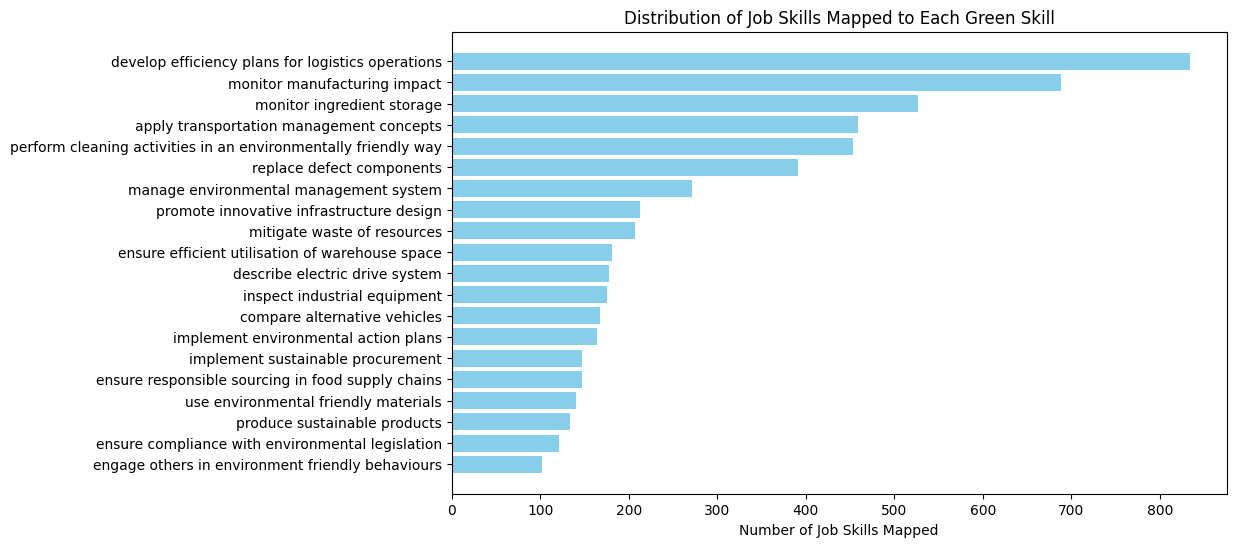

Total unique green skills mapped: 274
Total skills detected: 8575
Percentage of skills mapped to green skills: 4.38%


In [8]:
dataframe = pd.DataFrame(columns=["job_id", "job_skill", "month", "year", "skill_id" ,"esco_skill_name", "alternative_name", "prompt"])
FOLDER = "../data/green_skill_classification"

folders = []

for file in os.listdir(FOLDER):
    if file.endswith(".csv"):
        folders.append(os.path.join(FOLDER, file))

folders.sort()
for file in folders:
    df_part = pd.read_csv(file)
    dataframe = pd.concat([dataframe, df_part], ignore_index=True)

print(dataframe.shape)
dataframe.head()

Y = dataframe[dataframe["esco_skill_name"] != "No"]['esco_skill_name'].value_counts().sort_values(ascending=False)
X = Y.index

df_green_skill_values = pd.DataFrame({'skill': X, 'count': Y})
df_green_skill_values.to_csv("../data/green_skill_distribution.csv", index=False)

X = X[:20]
Y = Y[:20]

plt.figure(figsize=(10, 6))
plt.barh(X, Y, color='skyblue')
plt.xlabel('Number of Job Skills Mapped')
plt.title('Distribution of Job Skills Mapped to Each Green Skill')
plt.gca().invert_yaxis()  
plt.show()

print(f"Total unique green skills mapped: {len(dataframe[dataframe['esco_skill_name'] != 'No']['esco_skill_name'].unique())}")
print(f"Total skills detected: {df_green_skill_values['count'].sum()}")
print(f"Percentage of skills mapped to green skills: {df_green_skill_values['count'].sum() / dataframe.shape[0] * 100:.2f}%")

# Prepare data for model forecasting

The data should be structured as follows:
| skill_id | 2025-01 | 2025-02 | 2025-03 |
|----------|---------|---------|---------|
| skill_1  |   10    |   15    |   20
| skill_2  |   5     |   7     |   9     |
| ...      |   ...   |   ...   |   ...   |

Where each row represents a skill and each column represents the count of job postings requiring that skill for a specific month.

In [28]:
df = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset.csv")
df = df[df['esco_skill_name'] != 'No']
df.shape

(1370, 6)

In [29]:
df.head(2)

,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt
253,job_c224a426424c0995,preparacion en pintura base agua,1605,use environmental friendly materials,use environmental friendly material,"[{'role': 'system', 'content': 'You are an exp..."
750,job_1ec8b0bca53dfb96,habilidad en desarmar componentes,1281,dismantle broken appliances,brealing up wrecks,"[{'role': 'system', 'content': 'You are an exp..."


In [30]:
df_jobs = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-4_full_dataset.csv")
df_jobs.head()

,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt
0,job_624fd0a8f34770fb,experiencia en atencion al cliente,No,No,No,No
1,job_624fd0a8f34770fb,gusto por el servicio y atencion al cliente,No,No,No,No
2,job_624fd0a8f34770fb,preparatoria terminada,No,No,No,No
3,job_624fd0a8f34770fb,mayor de anos,No,No,No,No
4,job_624fd0a8f34770fb,experiencia en empleos presenciales,No,No,No,No


In [31]:
df_with_months = df.copy()

In [ ]:
df_with_months["job_id"] = df_with_months["job_id"].astype(str).str.strip()
df_jobs["job_id"] = df_jobs["job_id"].astype(str).str.strip()

df_jobs_unique = df_jobs.drop_duplicates(subset="job_id", keep="first")[["Job_ID", "month"]]
df_with_months = df_with_months.merge(df_jobs_unique, left_on="job_id", right_on="Job_ID", how="left")
df_with_months = df_with_months.drop(columns="Job_ID")


KeyError: 'Job_ID'

In [23]:
df_with_months.head(2)

,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt,month
0,243ef92c3012f0f0,capacidad para realizar analisis de parametros...,745,monitor manufacturing impact,monitor environmental parameters,"[{'role': 'system', 'content': 'You are an exp...",1.0
1,243ef92c3012f0f0,capacidad para conducir acciones correctivas y...,1102,implement environmental action plans,carry out environmental action plans,"[{'role': 'system', 'content': 'You are an exp...",1.0


In [11]:
plt.bar(df_with_months['month'].value_counts().sort_index().index,
        df_with_months['month'].value_counts().sort_index().values)
plt.xlabel('Month')
plt.ylabel('Number of Green Skills Mapped')
plt.title('Number of Green Skills Mapped per Month (Jan-Apr 2025)')
plt.show()

print(df_with_months['month'].value_counts().sort_index())

NameError: name 'df_with_months' is not defined

### Create pivot table


In [29]:
df_with_months = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-5_full_dataset_with_months.csv")

counts = df_with_months.copy()
counts = df_with_months.groupby(["esco_skill_name", "month"]).size().reset_index(name="count")

month_map = {1: "2025-01", 3: "2025-03", 4: "2025-04"}
counts["month"] = counts["month"].map(month_map)

result = counts.pivot(index="esco_skill_name", columns="month", values="count").fillna(0).astype(int)

result = result.reset_index()
result.head()

month,esco_skill_name,2025-01,2025-03,2025-04
0,abide by regulations on banned materials,5,3,3
1,adapt energy distribution schedules,1,6,5
2,adopt ways to foster biodiversity and animal w...,0,0,2
3,adopt ways to reduce negative impact of consum...,2,7,8
4,adopt ways to reduce pollution,6,3,2


In [30]:
result.to_csv("../data/green_skill_monthly_distribution.csv", index=False) 

In [31]:
summatory = 0
for col in result.columns[1:]:
    summatory += result[col].sum()
print(summatory)

6073
